# 1. Business Understanding

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

# 2. Data Understanding

In [1]:
import pandas as pd
# import numpy as np
from statsmodels.tsa.stattools import adfuller
# import statsmodels.api as sm
# import statsmodels.tsa.api as smt
# from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Monthly sales of company X
Monthly Boston armed robberies
International airline passengers: monthly totals in thousands
Mean monthly air temperature (Deg. F) Nottingham Castle
Weekly closings of the Dow-Jones industrial average
Daily total female births in California


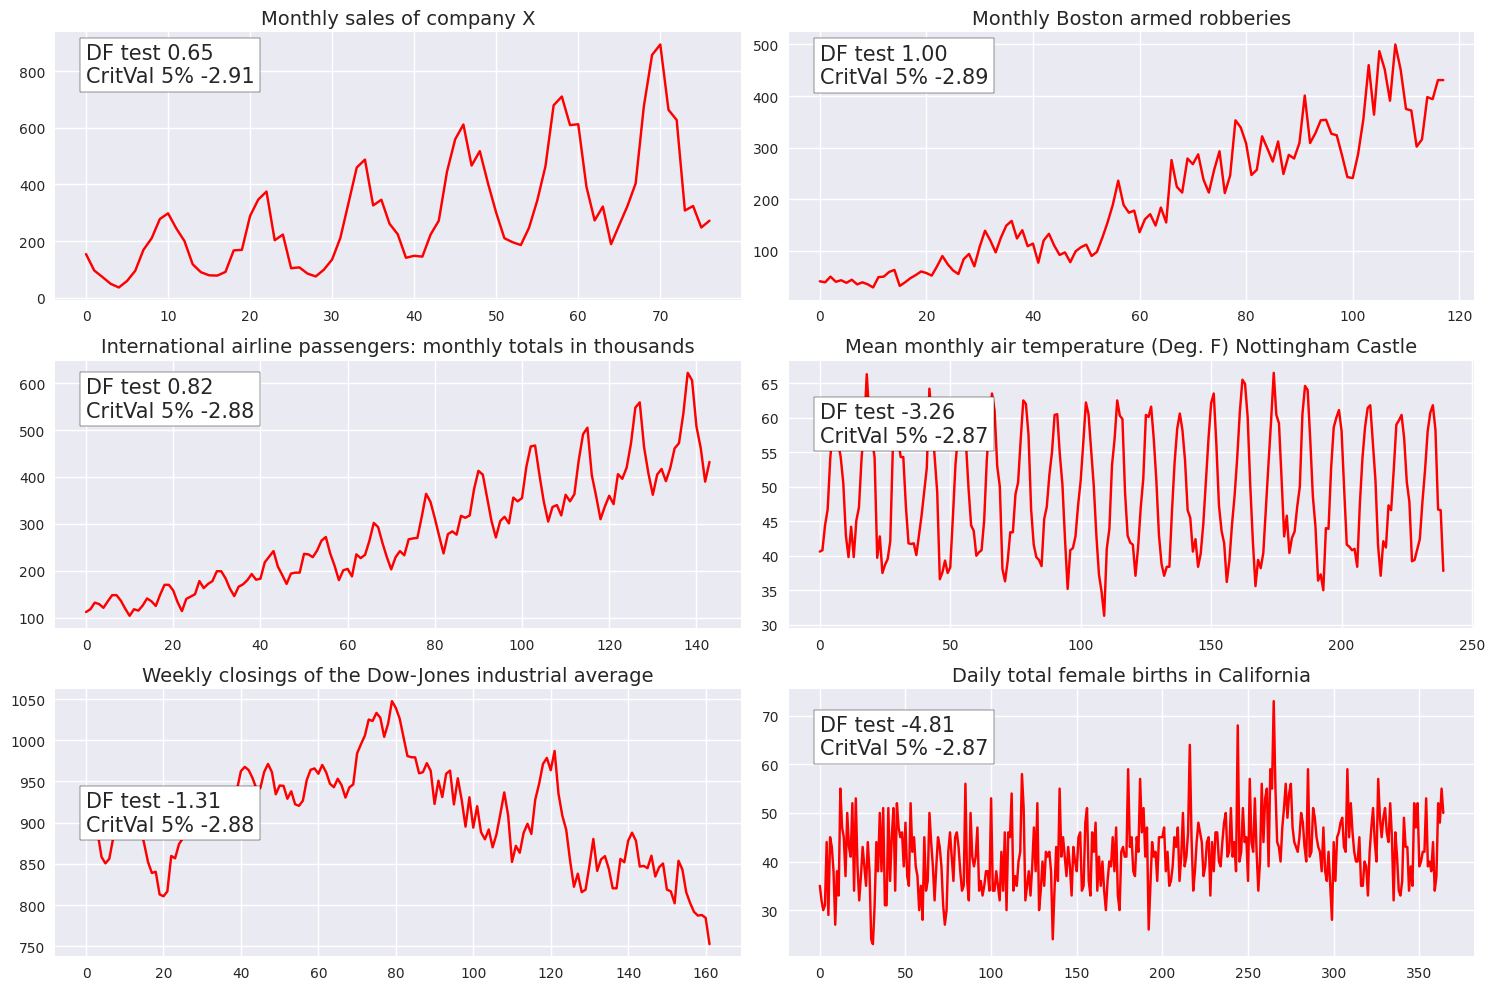

In [32]:
# plt.style.available
with plt.style.context('seaborn'): 
    plt.figure(figsize=(15, 10))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        print(key)    
        x = i % 2
        y = int((i - x) / 2)
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='red')
        ts_ax.set_title(key, fontsize=14)
        
        dftest = adfuller(all_series[key], autolag='AIC')
        critVal = dftest[4]['5%']
        dftest = dftest[0]
        ts_ax.text(0, max(all_series[key])*0.85, 
                   f'DF test {dftest:.2f}\nCritVal 5% {critVal:.2f}', 
                   fontsize=15,
                   bbox=dict(facecolor='white', alpha=1)) 
    plt.tight_layout()

Its looks like I should to remove nonstationarity from:
- Monthly sales of company X
- Monthly Boston armed robberies
- International airline passengers
- Weekly closings of the Dow-Jones industrial average 

# 3. Data Preparation

In [24]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                             'p-value', '#Lags Used', 
                                             'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput.round(2))
    
def tsplot(y, lags=None, figsize=(10, 7), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        y.plot(ax=ts_ax, color='red', label='Or')
        ts_ax.set_title(key,fontsize=14)

# I decided to remove redundant graphs. 
# They are looks very  interesting, but the standard time-graph takes less space in notebook.
# ------------------------------------------------------------------------------------------
#acf_ax = plt.subplot2grid(layout, (2, 0))
#         pacf_ax = plt.subplot2grid(layout, (3, 0))     
#         smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
#         smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
#         plt.tight_layout()
    return

In [25]:
for key in all_series.keys():
    print('\n', key)
    test_stationarity(all_series[key])


 Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.65
p-value                         0.99
#Lags Used                     12.00
Number of Observations Used    64.00
Critical Value (1%)            -3.54
Critical Value (5%)            -2.91
Critical Value (10%)           -2.59
dtype: float64

 Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                   1.00
p-value                          0.99
#Lags Used                      11.00
Number of Observations Used    106.00
Critical Value (1%)             -3.49
Critical Value (5%)             -2.89
Critical Value (10%)            -2.58
dtype: float64

 International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.82
p-value                          0.99
#Lags Used                      13.00
Number of Observations Used    130.00
Critical Value (1%)             -3.48
Critical Value (5%)             -2.8

In [26]:
all_series_selected = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    }

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -0.91
p-value                         0.79
#Lags Used                     12.00
Number of Observations Used    64.00
Critical Value (1%)            -3.54
Critical Value (5%)            -2.91
Critical Value (10%)           -2.59
dtype: float64
Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                  -2.01
p-value                          0.28
#Lags Used                      10.00
Number of Observations Used    107.00
Critical Value (1%)             -3.49
Critical Value (5%)             -2.89
Critical Value (10%)            -2.58
dtype: float64
International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -1.72
p-value                          0.42
#Lags Used                      13.00
Number of Observations Used    130.00
Critical Value (1%)             -3.48
Critical Value (5%)             -2.88
Crit

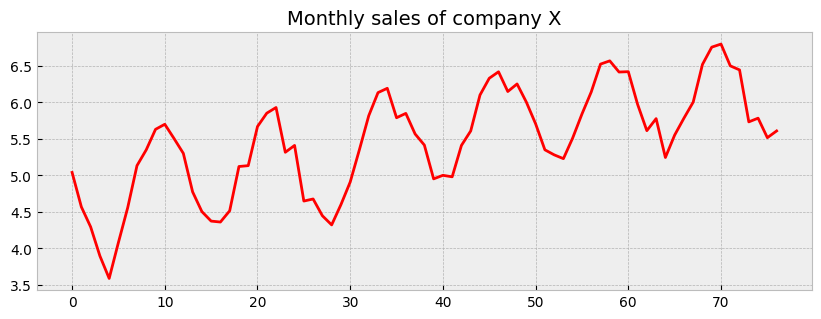

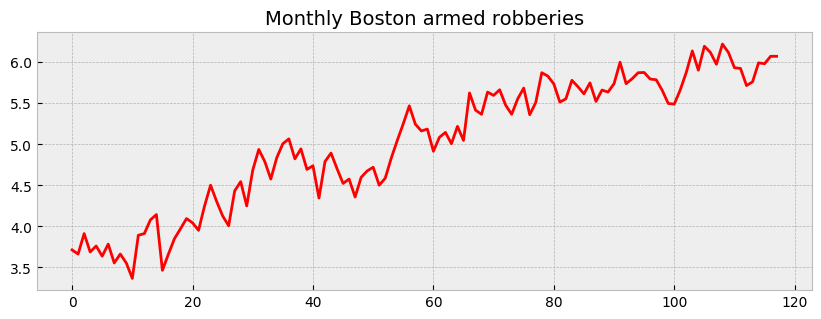

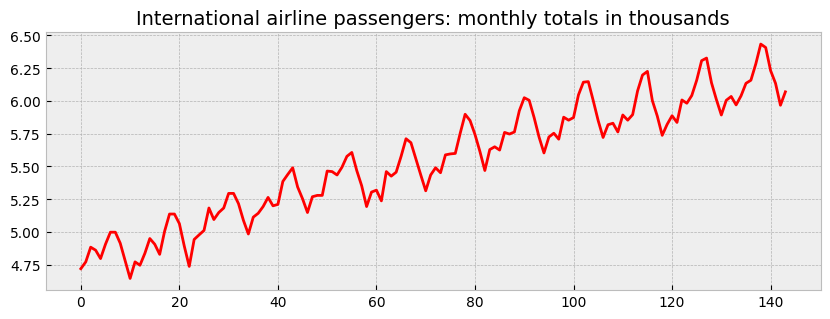

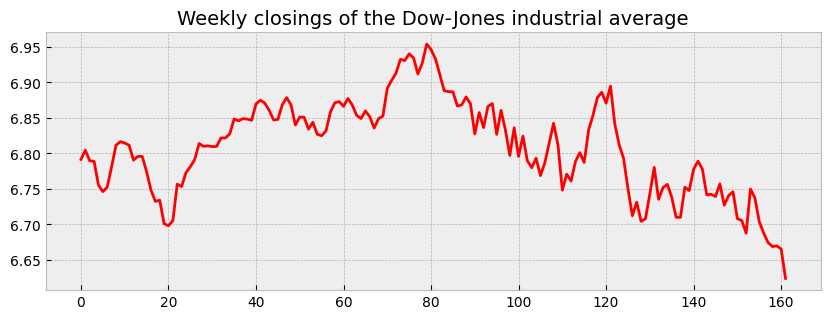

In [27]:
for key in all_series_selected.keys():
    print(key)
    series_bxcx = boxcox(all_series_selected[key], 0)
    tsplot(series_bxcx)

The Dickey-Fuller test still does not reject the nonstationary series hypothesis. The series chart shows a strong trend. We remove it by differentiation.


 Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -3.14
p-value                         0.02
#Lags Used                     11.00
Number of Observations Used    64.00
Critical Value (1%)            -3.54
Critical Value (5%)            -2.91
Critical Value (10%)           -2.59
dtype: float64

 Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                  -7.60
p-value                          0.00
#Lags Used                       3.00
Number of Observations Used    113.00
Critical Value (1%)             -3.49
Critical Value (5%)             -2.89
Critical Value (10%)            -2.58
dtype: float64

 International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -2.72
p-value                          0.07
#Lags Used                      14.00
Number of Observations Used    128.00
Critical Value (1%)             -3.48
Critical Value (5%)             -2.8

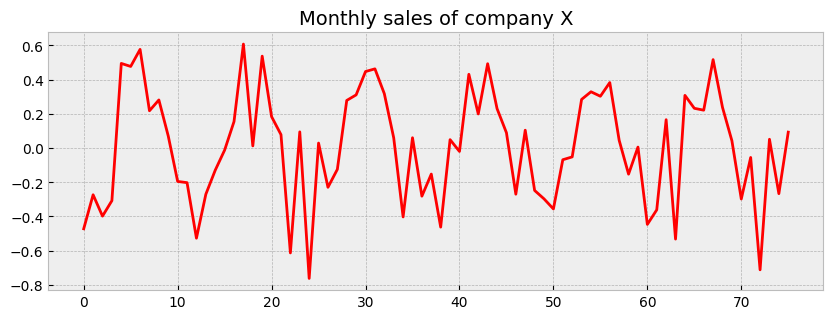

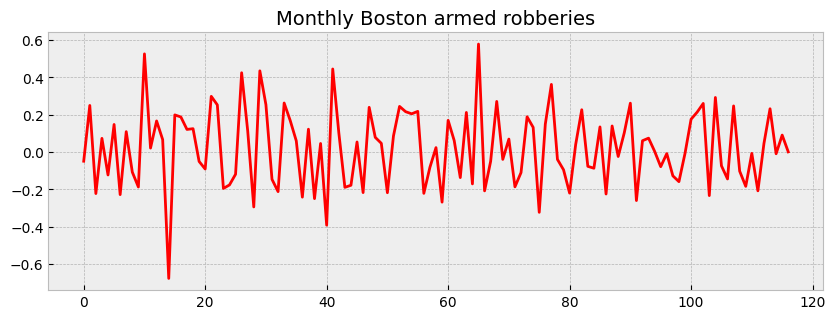

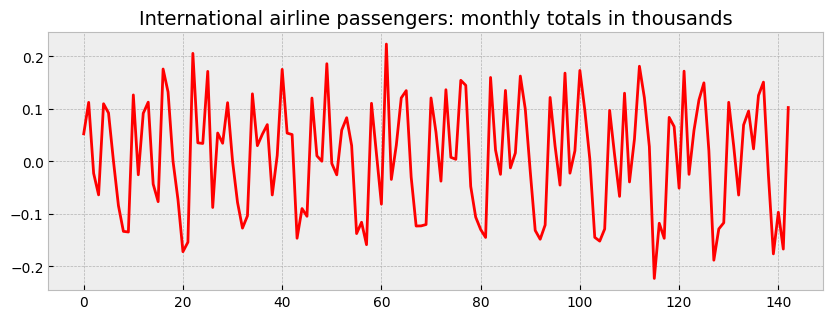

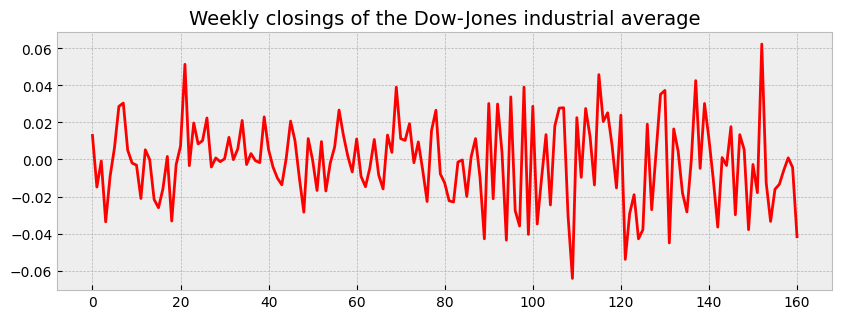

In [28]:
for key in all_series_selected.keys():
    print('\n',key)
    series_bxcx = boxcox(all_series_selected[key], 0)
    series_diff = series_bxcx[1:] - series_bxcx[:-1]
    tsplot(series_diff)

It has become even better cos majotiy of datasets have DF-test results below Critical Value 5%, but the correlogram graph for **International airline passengers** shows a strong influence of seasonality. Its neccessary to take it away

In [29]:
all_series_final = {
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    }

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -4.44
p-value                          0.00
#Lags Used                      12.00
Number of Observations Used    118.00
Critical Value (1%)             -3.49
Critical Value (5%)             -2.89
Critical Value (10%)            -2.58
dtype: float64


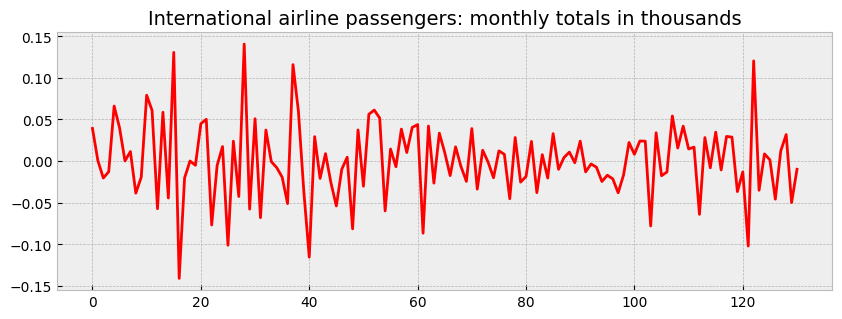

In [30]:
for key in all_series_final.keys():
    print(key)
    series_bxcx = boxcox(all_series_final[key], 0)
    series_diff = series_bxcx[1:] - series_bxcx[:-1]
    series = series_diff[12:] - series_diff[:-12]
    tsplot(series)

# 4. Modeling

# 5. Evaluation

# 6. Deployment